<a href="https://colab.research.google.com/github/yodavo/Learning_ML-DP-SIG/blob/main/2021/datasets/2021_12_(Copy)Working_with_fig_ax_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clearing the confusion once and for all: fig, ax = plt.subplots()

## Introduction 

> By reading this article, you will learn the two core objects in Maptlolib plots: figure and axes. You will finally understand the difference between simple plotting (`plt.plot`) and creating subplots with `plt.subplots()`.

When you begin your journey into Data Science, you are introduced to Matplotlib as your first library for Data Visualization. Most tutorials for beginners play a cruel trick on students by introducing them first to the 'beginner-friendly' `pyplot > plt` interface. As these poor students venture into the real world, they will find out the dudes on StackOverflow and most other 
people use a more flexible object-oriented way. They will get confused and most probably move on to Seaborn and Plotly. Or even worse, to the no-code interface of Tableau, like I almost did. (Because of this confusion, I specifically remember myself going through Quora and StackOverflow threads wondering if people were using Tableau over Matplotlib)

This notebook will introduce you to figure and axes objects in Matplotlib and their advantages over other methods.

> This notebook is a direct copy of my article on the topic on Medium. Visit it [here](https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca).

### Overview

   I. [Introduction](#introduction)

  II. [Setup](#setup)

 III. [plt.subplots(), preliminary understanding](#preliminary)

  IV. [Axes methods vs. pyplot, understanding further](#further)

   V. [plt.subplots() grid system](#grid)

  VI. [Doubling axis](#doubling_axis)

 VII. [Sharing a commong axis between subplots](#common_axis)

VIII. [Working with figure object](#figure)

  IX. [Conclusion](#conclusion)

## Setup <small id='setup'></small>

In [1]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'  
# No need to include %matplotlib inline magic command. These things come built-in now.

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [36]:
# Load some sample data
# ! wget https://raw.githubusercontent.com/yodavo/Learning_ML-DP-SIG/main/2021/datasets/climate_change.csv
# ! wget https://raw.githubusercontent.com/yodavo/Learning_ML-DP-SIG/main/2021/datasets/medals_by_country_2016.csv

medals = pd.read_csv('/content/medals_by_country_2016.csv', index_col=[0])
climate_change = pd.read_csv('/content/climate_change.csv', parse_dates=['date'])

In [12]:
# Basic exploration
medals.info()
climate_change.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, United States to Japan
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Bronze  10 non-null     int64
 1   Gold    10 non-null     int64
 2   Silver  10 non-null     int64
dtypes: int64(3)
memory usage: 320.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           706 non-null    datetime64[ns]
 1   co2            699 non-null    float64       
 2   relative_temp  706 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 16.7 KB


In [14]:
medals.head()
climate_change.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
3,1958-06-06,NaN,-0.05
4,1958-07-06,315.86,0.06


### `plt.subplots()`, **preliminary understanding**

It all starts with calling `.subplots()` command:

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcb52f50710>)

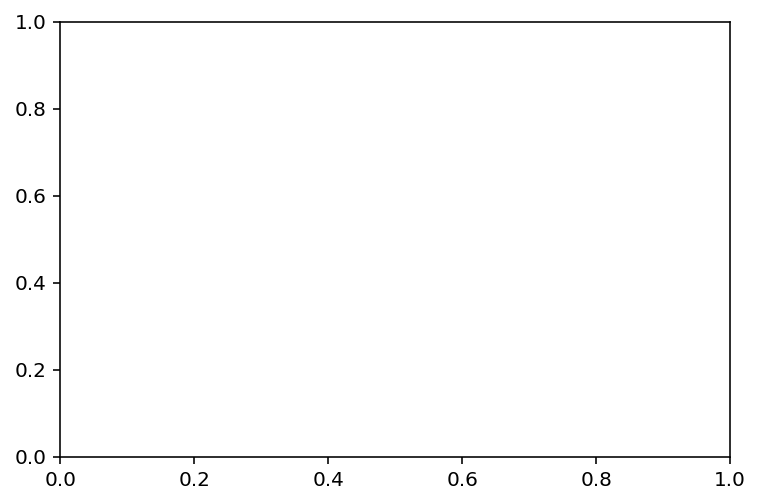

In [15]:
plt.subplots()

If you pay attention, apart from the blank plot, the function also returned a tuple of two values:

__\[OUT\]:__ (<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

Everytime we call `subplots()` function, it will return these types of tuples always with two values. 
In Python, there is a technique called tuple unpacking. Let me show you a simple example:

In [16]:
# Create an arbitrary tuple
numbers = (10, 11, 12)
# Assign each of its values to a single variable
ten, eleven, twelve = numbers

If we print the values of the above three:

In [17]:
print(ten)
print(eleven)
print(twelve)

10
11
12


Great, we unpacked a tuple of size 3 into three different variables. 
So, now you will understand this code better:

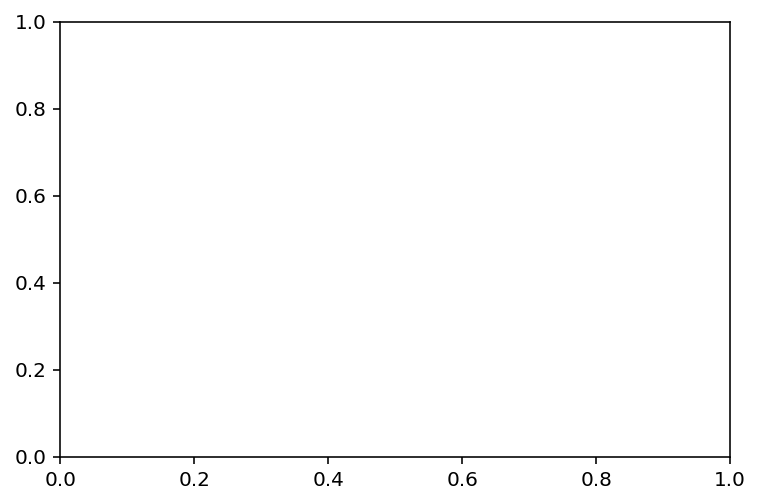

In [18]:
# Two variables because function returns tuple of size 2
fig, ax = plt.subplots()

We created two variables, `fig` and `ax`. Remember, these are arbitrary names but a standard and we are one of the good guys, so we will follow the convention.

These two variables now hold the two core objects used for all types of plotting operations. First object `fig`, short for `figure`, imagine it as the frame of your plot. You can resize, reshape the frame but you cannot draw on it. On a single notebook or a script, you can have multiple figures. Each figure can have multiple subplots. Here, subplot is synonymous with axes. 
The second object, `ax`, short for axes, is the canvas you draw on. Or rephrasing, it is the blank sheet you can plot and hold your data. An axes object can only belong to one figure. 

### Axes methods vs. pyplot, understanding further <small id='further'></small>

At the beginning of the post, I said that `pyplot` was a more beginner-friendly method to interact with Matplotlib. It is true that compared to axes methods, `pyplot` offers a quicker and more concise method of plotting. It will have less local variables and syntax. But why most people prefer the object-oriented way?

Let's see the concise way of `pyplot`:

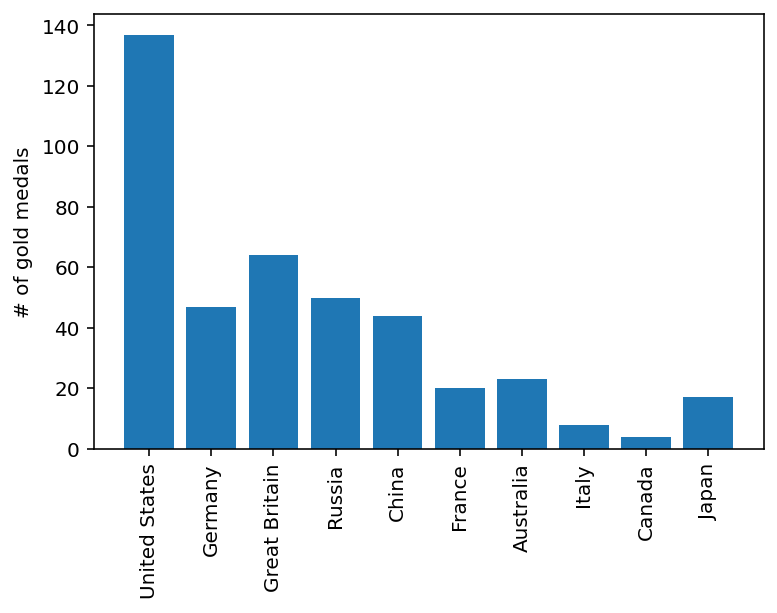

In [19]:
plt.bar(medals.index, medals['Gold'])
plt.xticks(rotation=90)
plt.ylabel('# of gold medals');

Well, this was easy. It only took us three lines. Now let's what happens if we try to plot (completely unrelated) the climate change data next to it:

In [21]:
plt.bar(medals.index, medals['Gold'])
plt.xticks(rotation=90)
plt.ylabel('# of gold medals')
plt.plot(climate_change['date'], climate_change['co2']);
# thrown an error

In this case, we get a `TypeError`. `pyplot`, on its own, cannot create new axes or a new figure and intelligently plot the new data. As we get to more complex plotting like this one, we are going to need more a flexible approach. 

Mpl has this concept called `current figure`. By default, `pyplot` itself creates a `current figure` axes and plots on it. If for example, we want to focus on that `current figure` and plot extra data on it, like we tried in the last example, `pyplot` moves the `current figure` to a new one immediately after a new plotting command is given. 

To avoid this, let's see the approach where we are in full control of each figure and axes:

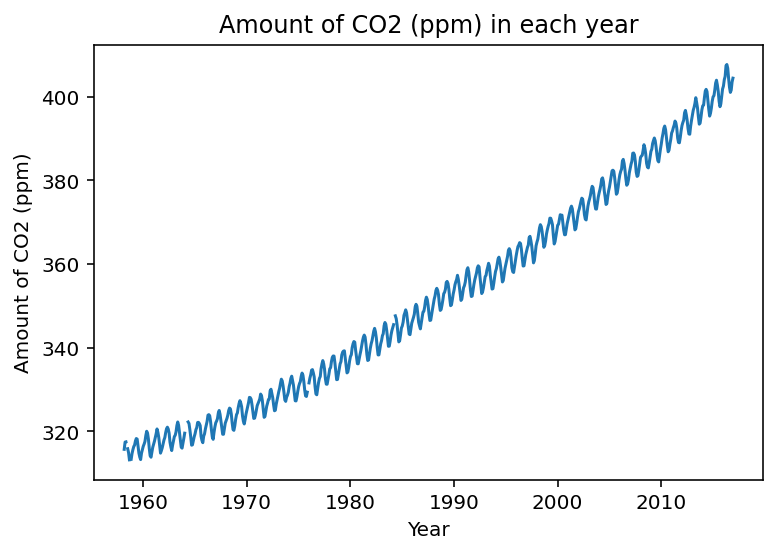

In [22]:
fig, ax = plt.subplots()
ax.plot(climate_change['date'], climate_change['co2'])
ax.set(title='Amount of CO2 (ppm) in each year', xlabel='Year', ylabel='Amount of CO2 (ppm)');

We specifically point out that we are working on this `fig` object. It means that any plotting command we write will be applied to the axes (`ax`) object that belongs to `fig`. Unless, we define a new figure with `plt.subplots()` command, the current `figure` will be the variable `fig`. This way is very nice since now we can create as many axes or subplots in a single figure and work with them.

> From now on, I will be using subplot and axes terms interchangeably as they are synonyms

### plt.subplots() grid system <small id='grid'></small>

We saw an example of creating one subplot. Let's see how can create more in a single figure:

<class 'numpy.ndarray'>


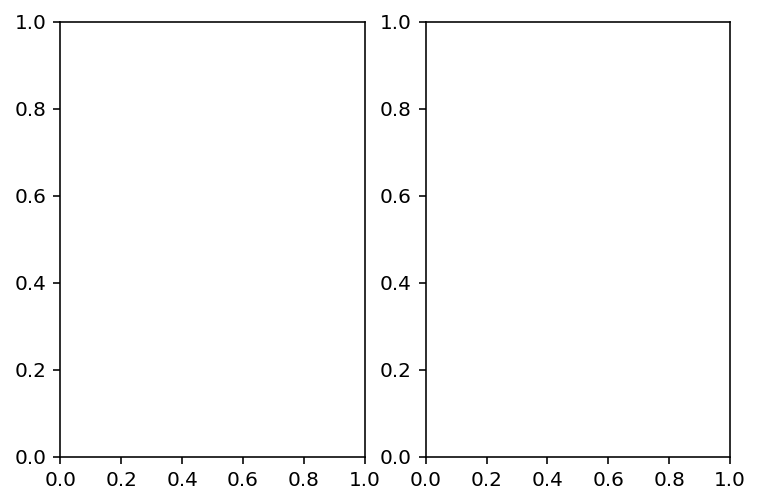

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2)
print(ax)
print(type(ax))

Among other parameters, `.subplots()` have two parameters to specify the grid size. `nrows` and `ncols` are used to point out the number of rows and columns we need respectively. If you paid attention, now our second variable contains not one but two axes. And it is now given as a `numpy.ndarray`. So, we have to unpack or index this array to use our plotting commands:

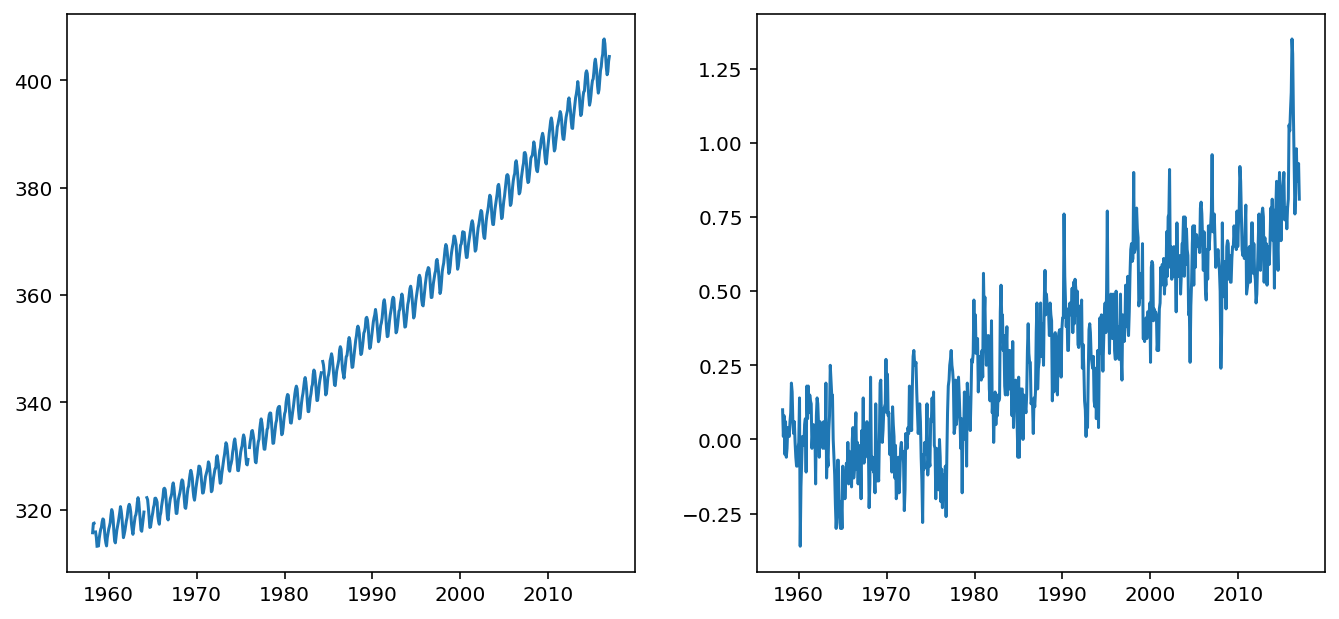

In [24]:
# Unpacking method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=3)
ax1.plot(climate_change['date'], climate_change['co2'])
ax2.plot(climate_change['date'], climate_change['relative_temp'])

plt.show();

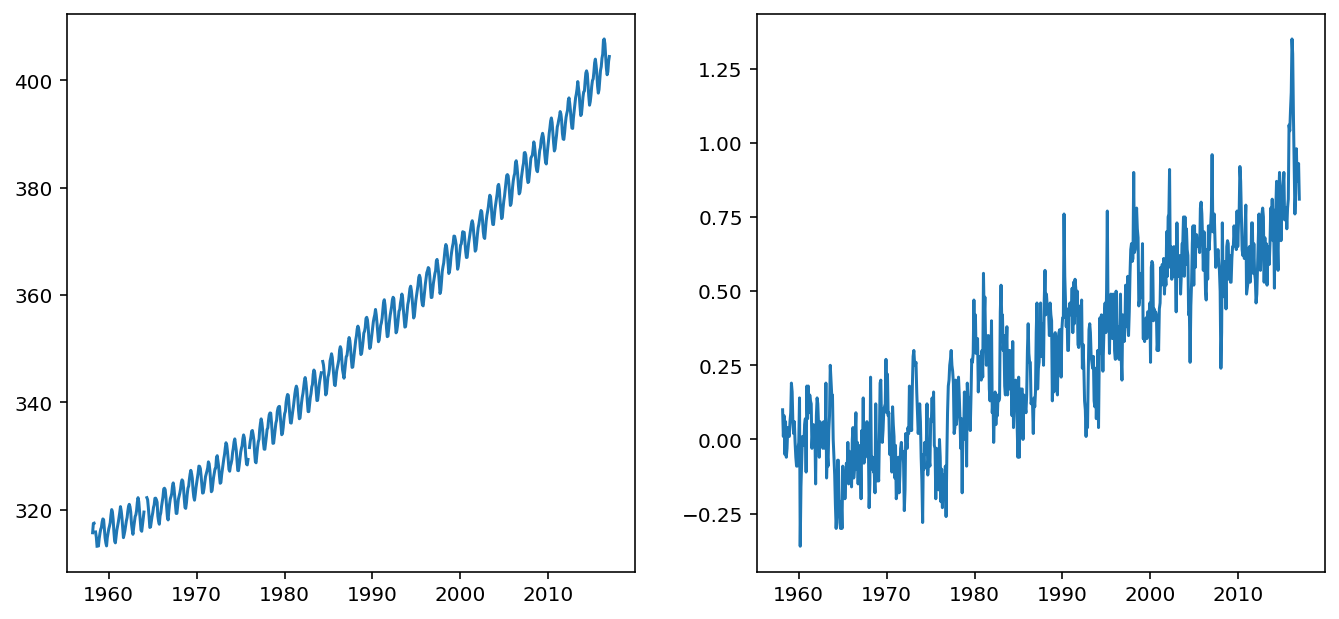

In [25]:
# Indexing method
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=3)
ax[0].plot(climate_change['date'], climate_change['co2'])
ax[1].plot(climate_change['date'], climate_change['relative_temp'])

plt.show();

> __Pro Tip__: Notice the `fig.tight_layout()` function with `padding` set to 3. It will give the subplots a little breathing room.

The two methods are completely similar and up to you to choose one.
Let's see one more example but slightly more difficult:

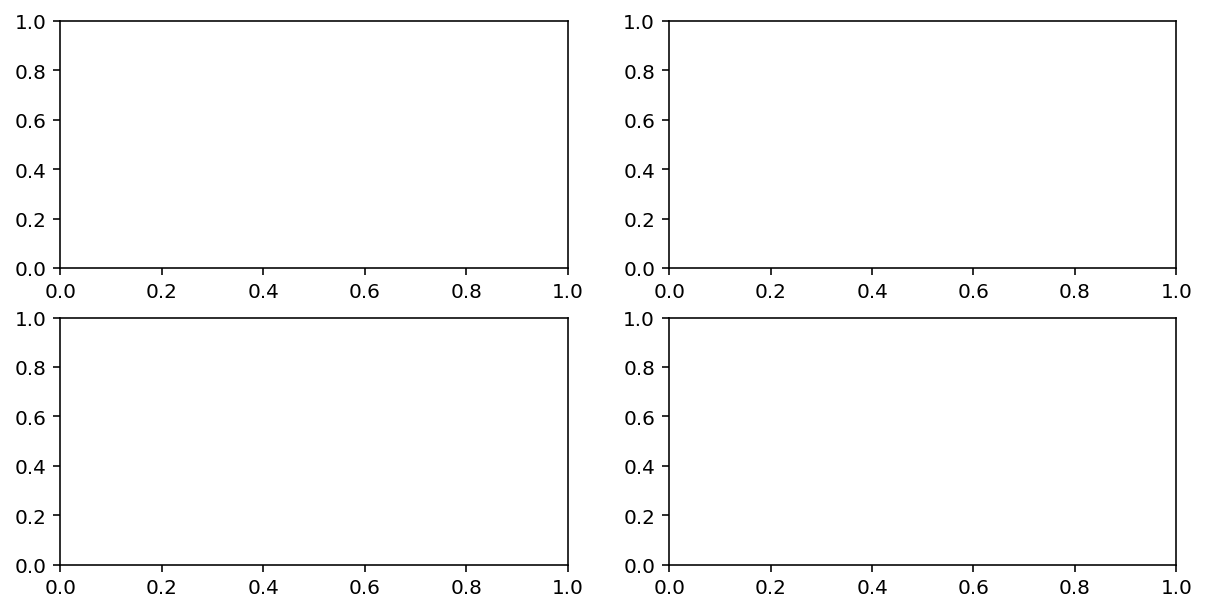

In [26]:
# Unpacking method
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5))
# .....

(2, 2)

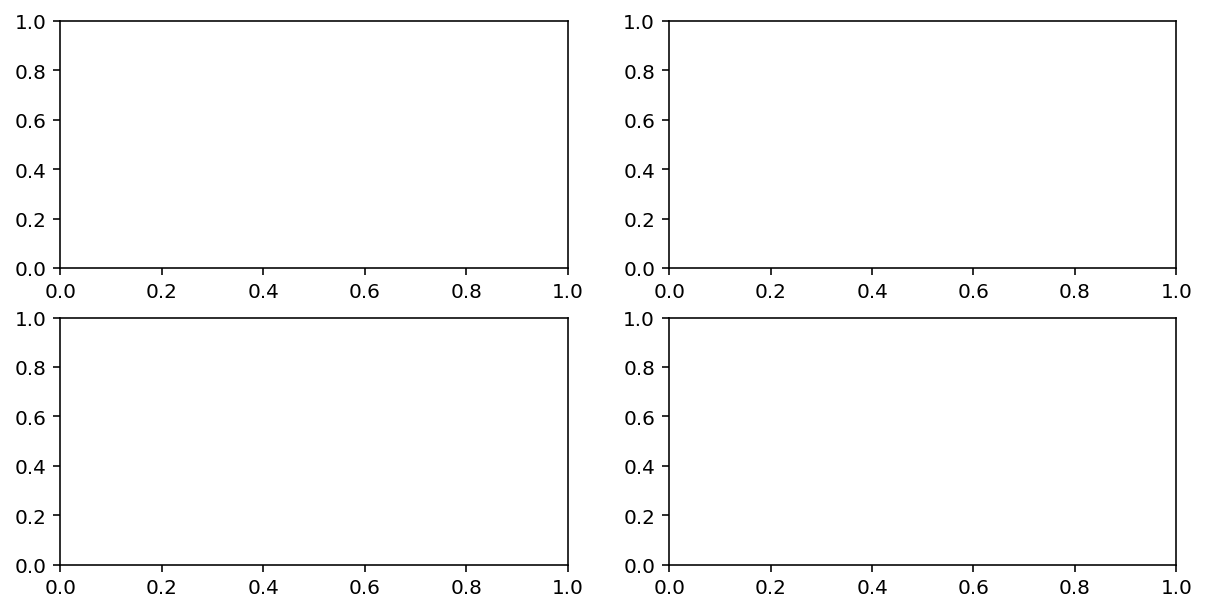

In [27]:
# Indexing method
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax.shape
# ax[0, 0].plot(___)   
# ax[1, 1].plot(___)

> __Pro Tip__: Set the `figsize=(width, height)` argument properly. It will make your plots more stylish.

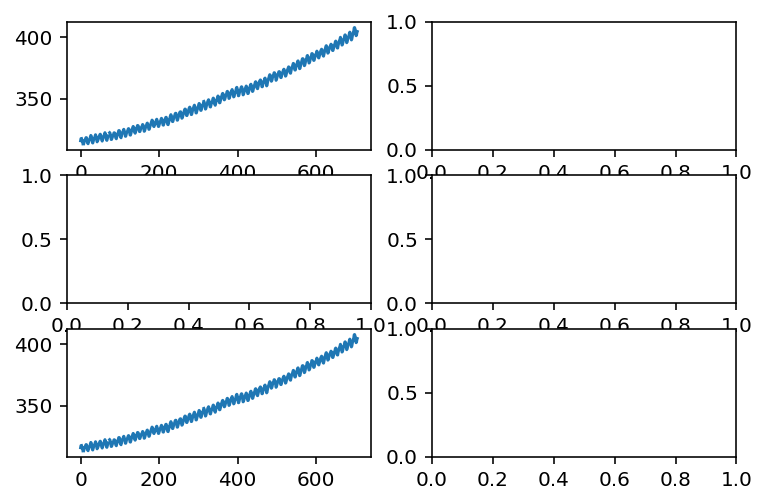

In [31]:
# Additional method if you don't want to use double indexes
fig, ax = plt.subplots(3, 2)
ax.flat[0].plot(climate_change['co2']);
ax.flat[4].plot(climate_change['co2']);

This article is not about plotting in particular, but to give you intuition for figure and axes objects. However, let me briefly walk you through some of the other common methods for the axes object:

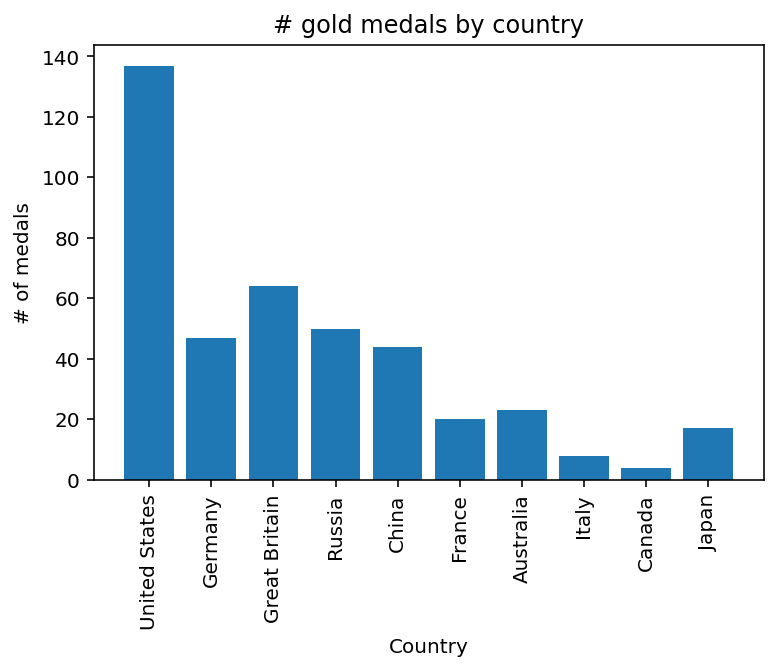

In [32]:
# Setting title, labels, etc.
fig, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'])
ax.set(title='# gold medals by country', ylabel='# of medals', xlabel='Country')
ax.set_xticklabels(medals.index, rotation=90)

plt.show();

All the methods that are available in `pyplot` API has an equivalent through `ax.set_`. If you use a general, `ax.set()`, you will avoid repetition when you have multiple subplots. However, if you need to specify additional parameters to specific parts of your plot, use `ax.set_`:

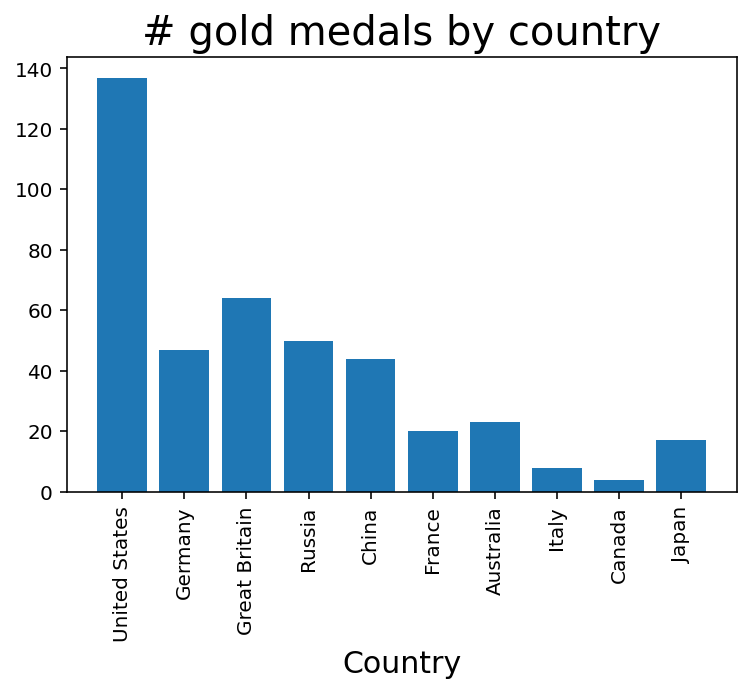

In [33]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'])
ax.set_xticklabels(medals.index, rotation=90)
ax.set_xlabel('Country', fontsize=15)
ax.set_title("# gold medals by country", fontsize=20)
plt.show();

### Doubling axis <small id='doubling_axis'></small>

Sometimes, we want to have a single subplot to have more than one `XAxis` or `YAxis`. While it is not possible with plain `pyplot` interface, it is very easy with top-level `figure` object-oriented API. Let's say we want to plot the `relative_temp` and `co2` columns of `climate_change` in a single plot. We want them to share an `XAxis` since the data is for the same time period:

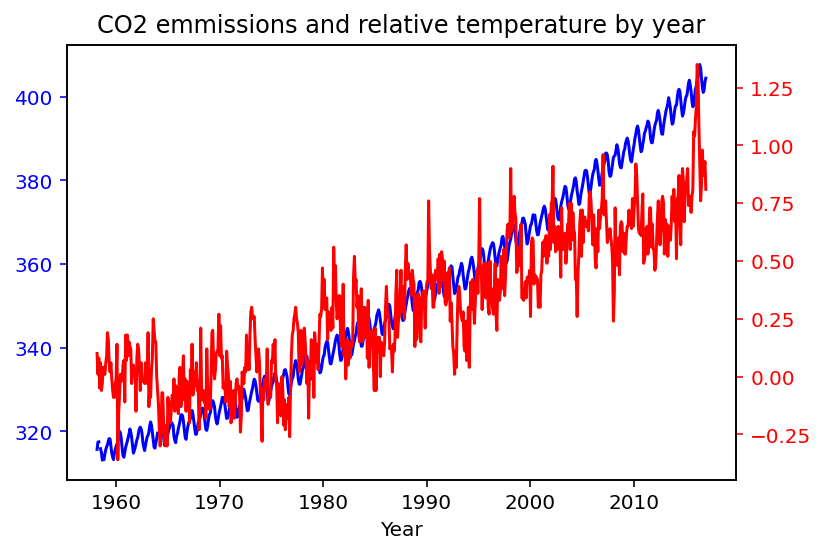

In [ ]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Plot CO2 emissions with a blue line
ax.plot(climate_change['date'], climate_change['co2'], color='blue')

# Specify that we will be using a twin x axis
ax2 = ax.twinx()

ax2.plot(climate_change['date'], climate_change['relative_temp'], color='red')

# Change the color of ticks
ax.tick_params('y', colors='blue')     # 'y' because we want to change the y axis
ax2.tick_params('y', colors='red')

ax.set(title='CO2 emmissions and relative temperature by year',
      xlabel='Year') # Does not matter which one you pick, ax or ax2
plt.show();

We wanted to have a common `XAxis`, which was `date` column, so we created another axis using `ax.twinx()`. If in some cases you want a common `YAxis`, the function is `ax.twiny()`.

### Sharing a commong axis between subplots <small id='common'></small>

Let's say we wanted to compare the CO2 emissions of the eighties with nineties. Ideally, we would want to plot the eighties on side and nineties to the other. So, let's subset our data for these two time periods:

In [37]:
# Set the date column as index for easy subsetting
climate_change.set_index('date', inplace=True)

# Subset data for two time periods
eighties = climate_change['1980-01-01': '1989-12-31']
nineties = climate_change['1990-01-01': '1999-12-31']

> __Pro Tip__: Set the date column as an index for a dataframe if you are working with time-series data. Use `.set_index()` method or use `index_col` parameter in `pd.read_csv()` function. It will make subsetting for time periods much easier.

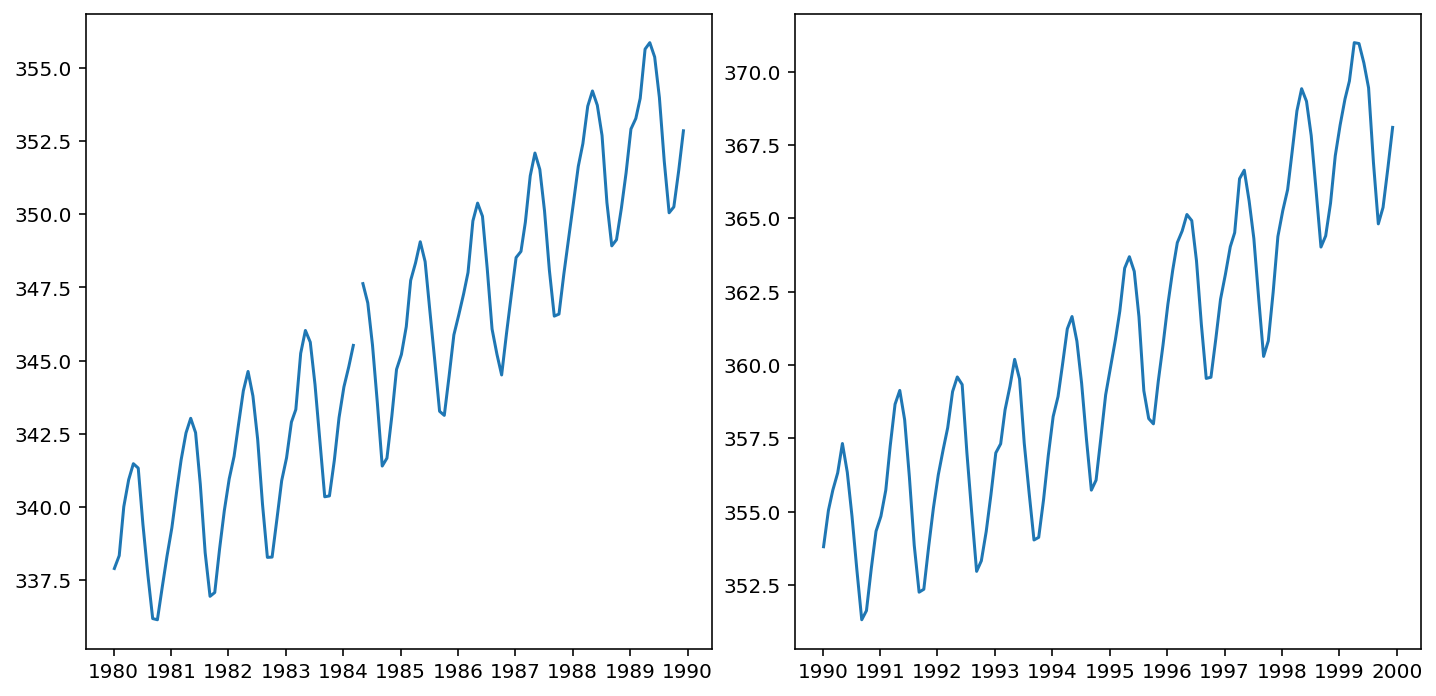

In [38]:
# Create axes and  a figure
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout()
# Plot eighties
ax[0].plot(eighties.index, eighties['co2'])
# Plot nineties
ax[1].plot(nineties.index, nineties['co2'])

plt.show();

Great, we have the two plots side by side, but if we look closer, our plots are misleading. It looks like there was not much difference in CO2 emmissions throughout two time periods. The reason for this is that the two plots have different `YAxis` ranges. Let's set it right for better insight:

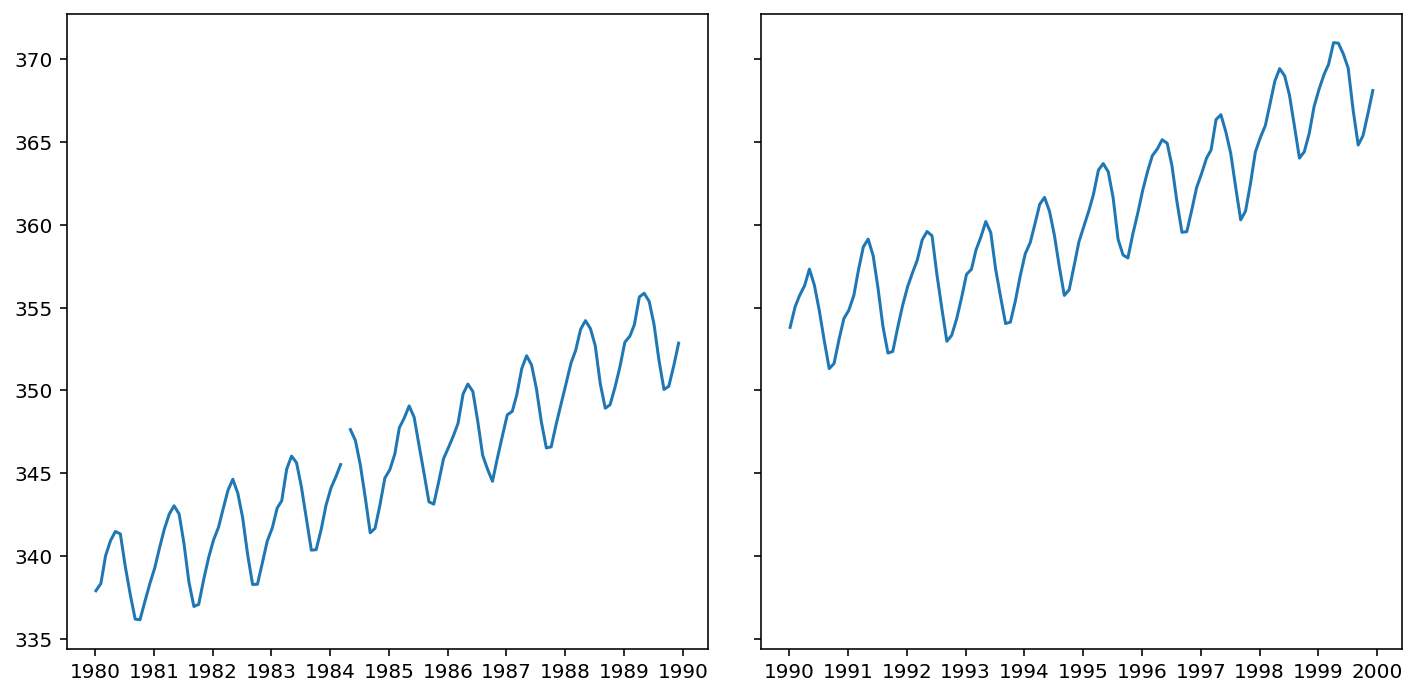

In [40]:
# Create axes and  a figure
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.tight_layout()
# Plot eighties
ax[0].plot(eighties.index, eighties['co2'])
# Plot nineties
ax[1].plot(nineties.index, nineties['co2'])

plt.show();

Now, it is clear that CO2 emissions continued increasing through time (it is much higher that this right now). We use `sharey=True` to specify that we want the same `YAxis` for all the subplots.

### Working with figure object <small id='figure'></small>

I think you noticed that once you create a figure object using `.subplots()` command or other methods, pretty much everything happens with axes objects. One common method of `figure` object is `savefig()` method, which is used often. So, let's get exploring. We will get back to our double-axed plot of CO2. Let's save it to local memory:

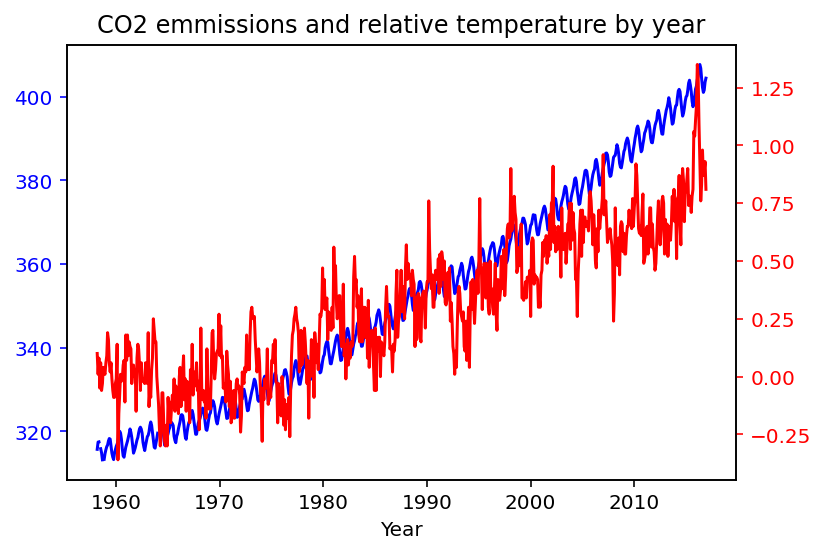

In [41]:
# Create a figure and an axis
fig, ax = plt.subplots()
# Plot CO2 emissions with a blue line
ax.plot(climate_change.index, climate_change['co2'], color='blue')

# Specify that we will be using a twin x axis
ax2 = ax.twinx()

ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')

# Change the color of ticks
ax.tick_params('y', colors='blue')     # 'y' because we want to change the y axis
ax2.tick_params('y', colors='red')

ax.set(title='CO2 emmissions and relative temperature by year',
      xlabel='Year') # Does not matter which one you pick, ax or ax2

fig.savefig('co2_relative_temp.png');

We passed a filename as a string to save. This saves an image with that name in root directory. Possible image formats to use:
    1. `.png` - if you want your figures to be of high quality and do not care about disk space, use `png`. This format allows for lossless compression.
    2. `.jpg` - lossy compression. `jpg` images will have less size than `png`s and have lower quality. This format is recommended if you want to upload the images later to a website or similar.
    3. `.svg` - supports animations and image editing. Use this format if you want to modify the figures using editing software like Adobe Illustrator.

Other parameters of `.savefig()` allows for cotrolling the quality of your figures:

In [42]:
fig.savefig('sample.png', dpi=300)  # Stands for dots per inch, 300 is very high quality
fig.savefig('sample.jpg', quality=50)   # Control image quality with percentage

### Conclusion <small id='conclusion'></small>

I hope that you now have a clear understanding of figure and axes objects. We only covered one of the methods of plotting in Matplotlib. The library can go as deep as you want if you wish to explore further. You can learn more about the methods of figure and axes objects on the official [documentation](https://matplotlib.org/tutorials/index.html) of Matplotlib. I highly suggest you try out other features and practice!